Answer the question what is the effect of lenghening the still line for a BF refrigerator. <br> 
<hr>
24-Feb-23    CBL Original, Equations based on conversations with Shawn Hall. The conversation is included here. 
<hr>
From Shawn Hall: <br> 
In our discussion yesterday of pressure drop in the still line, I mentioned the classic computation of pressure loss $\Delta p$ in a pipe using the <a href="https://en.wikipedia.org/wiki/Moody_chart">Moody diagram </a>, which is a plot of the so-called <a href="https://en.wikipedia.org/wiki/Darcy_friction_factor_formulae"> Darcy friction factor f </a> as a function of Reynolds number $ Re = {\rho UD \over{\mu}} $ and normalized pipe-wall roughness ${e\over{D}}, where: <br>
 
$\rho$ = Density of fluid $[{kg\over{m^3}}]$ <br>
U = Bulk velocity of fluid in pipe $[{m\over{s}}]$ <br>
D = Pipe diameter [m] <br>
$\mu$ = Absolute viscosity of fluid $[{kg\over{m-s}}]$ <br>
e = Pipe-wall roughness [m] <br>
<br>
The basic formula is: <br>
$\Delta p = (0.5 \rho U^2 ) ({L\over{D}}) f $ <br>
 
where the grouping in the first parentheses is called the “dynamic pressure” of the flow. <br>
 
Note that for laminar flow, which occurs at low Reynolds number (Re < 2000), the formula for f is very simple: <br>
 
$f = {64 \over{Re}} $ <br>
 
The functional relationship for $f = f(Re, {e\over{D}})$ in the turbulent regime (higher Reynolds number) is more complicated.  As you can see from the formulae in the second link above, many people have taken stabs at fitting the data represented by the Moody diagram. <br>
<br> 
Chris’s question -- about whether this classic pipe flow analysis is valid for rarefied gas – is a good one.  I seem to recall that, when I asked myself that question some years ago and poked around on the internet, and answer was yes, but please don’t bank on my memory. <br>

27-Feb-23 <br> 
PressureAtTurbo = 0.015 - 0.2 mbar <br>
If the pressure is that high, it’s not a rarefied gas, so normal fluid mechanics should apply.<br> 
<br>
I found this, which says that for helium, the relation between pressure p and mean-free path L is: <br> 
<br> 
$ L p = 17.5 \times 10^{-3}$  [m-Pa] <br>
 <br>
For the pressure you cite of 50,000 Pa, L = 0.35 um.  Assuming a characteristic length of the pipe diameter D = 100 mm, the Knudsen number is <br> 
$ K_{n} = {L\over{D}} =  3.5 \times 10^{-6}$. <br> 
According to the Wikipedia article, this is well in the range of continuum flow.
 
<br> 
<h1> Moody Diagram </h1>
<img src="Pics/Moody_diagram.jpg">



In [133]:
"""
For our systems the still line pipe OD = 4", ID = ?
"""
import numpy as np
import matplotlib.pyplot as plt
import math

In [134]:
def HeDensity(Pressure):
    """
    He4 density as function of pressure. 
    @param Pressure in bar
    """
    STP_rho = 0.166 # Kg/m^3
    # 1 bar STP    
    rho = STP_rho * Pressure  # ideal gas law n1/n2 = p1/p2
    return rho

In [135]:
def Reynolds(Pressure, Diameter, U):
    """
    Calculate Reynolds Number:
    @param Pressure - Pressure of mix in bar for the Still line
    @param Diameter - Diamater of pipe in meters
    @param U - Velocity of fluid in pipe m/s
    """
    # https://www.engineeringtoolbox.com/gases-absolute-dynamic-viscosity-d_1888.html
    # https://journals.lww.com/anesthesia-analgesia/fulltext/1993/02000/helium_and_gas_flow.50.aspx
    mu = 1.95e-5 # Pa - s, also Kg/(m-s)
    rv = HeDensity(Pressure) * U * Diameter/mu
    return rv

In [136]:
def VelocityFromMMpersec(MMperSec, Pressure):
    """
    calculate the velocity from the mmol/second.
    @param MMperSec - milli-mols per second of mix  (0.4 to 0.9 mmol/s)
    @param Pressure - in bar
    """
    throat = 4.0 * 0.0254           # 4 inches OD, don't know ID, into meters
    LitersPerMol = (22.4/Pressure)  # 22.4 L/mol at STP, higher pressure means lower volume
    M3PerLiter   = 0.001            # cubic meters per Liter
    ThroatCrossSection = 2.0 * np.pi * throat  # square meters
    # 
    # Mols/s /Mols/
    Velocity = (MMperSec*1.0e-3)* LitersPerMol * M3PerLiter/ThroatCrossSection
    return Velocity

In [150]:
def DeltaP(U, Length, Diameter, Pressure):
    """
    @param U        - bulk velocity in pipe
    @param Length   - Length of pipe (same units as Diameter)
    @param Diameter - Diameter of pipe in same units as length. 
    """
    f  = 64/Reynolds(Pressure,Diameter,U) # Darcy Friction Factor
    rv = 0.5 * HeDensity(Pressure) * np.power(U,2.0) * Length/Diameter * f
    return rv

In [151]:
def PascalFromBar(Bar):
    return 1.0e5*Bar

In [152]:
PressureAtTurbo = 0.015*1.0e-3 # in Bar, Pressure varies (0.015 - 0.2 mbar)
Diameter = 4.0 * 0.0254 # meters
Length   = 4.0          # meters
U = VelocityFromMMpersec(0.41, PressureAtTurbo)
#
print(HeDensity(PressureAtTurbo), ' ', Reynolds(PressureAtTurbo, Diameter, U))
#print(VelocityFromMMsec(0.41, PressureAtTurbo))

2.4900000000000003e-06   0.012443010951850795


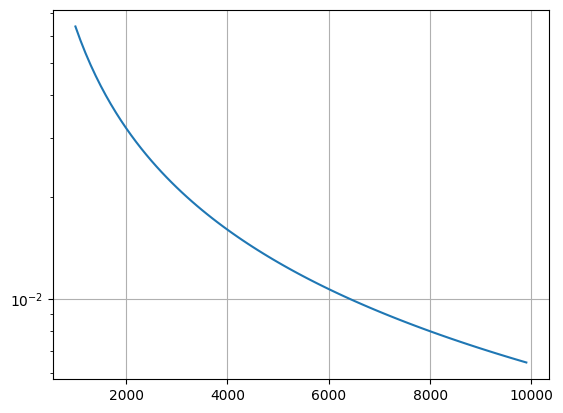

In [153]:
RN = np.arange(1e3, 1e4, 100)
f = 64.0/RN
plt.semilogy(RN, f)
plt.grid()
# this repeats the above 

In [160]:
# debug reynolds number
PressureAtTurbo = 0.015*1.0e-3 # in Bar, Pressure varies (0.015 - 0.2 mbar)
#PressureAtTurbo = np.arange(0.01e-3, 0.2e-3, 0.005e-3 )
#PressureAtTurbo = 1.0
Diameter = 4.0 * 0.0254         # meters
Length = 1
#Length   = 4.0                  # meters
#Length = np.arange(4.0, 8.0, 0.1)
U   = VelocityFromMMpersec(0.41, PressureAtTurbo)
#U   = np.arange(0.1,1.0, 0.05)
Re   = Reynolds(PressureAtTurbo, Diameter, U)
#
#print(HeDensity(PressureAtTurbo), ' ', Reynolds(PressureAtTurbo, Diameter, U))
DP = DeltaP(U, Length, Diameter, PressureAtTurbo)
print(DP)
#plt.plot(PressureAtTurbo*1.0e3, DP)
#plt.plot(Length, DP)
#plt.grid()

0.05797813130414199


In [161]:
0.5*HeDensity(PressureAtTurbo)*np.power(U,2.0)*Length/Diameter*64/Re

0.057978131304142

In [165]:
U

0.9591069536456475